<a href="https://colab.research.google.com/github/gilvardperez/Ciencia-de-datos/blob/main/2_Visualizando_outlier_valores_at%C3%ADpicos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



Visualización de datos atípicos o Outlier.

Artículo realizado por Gilvard Pérez


[LinkedIn](https://www.linkedin.com/in/gilvardperez)

#Carga de datos

In [2]:
from sklearn.datasets import load_wine
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

En esta ocasión trabajaremos con el set de datos "Wine"

In [3]:
wine_data = load_wine()
df = pd.DataFrame(data=wine_data.data, columns=wine_data.feature_names)
df['target'] = wine_data.target

In [4]:
# Ver data frame
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [5]:
# Información del set de datos
print("\nInformación sobre el conjunto de datos:")
print(wine_data.DESCR)


Información sobre el conjunto de datos:
.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:  

#Outliers

Los datos atípicos, también conocidos como outliers, son observaciones que se encuentran significativamente fuera del patrón general de los datos. Estas observaciones pueden ser el resultado de errores en la medición, anomalías genuinas en los datos o simplemente valores extremos dentro de la distribución de los datos. Los outliers pueden afectar negativamente los análisis estadísticos y los modelos de aprendizaje automático si no se manejan adecuadamente, ya que pueden sesgar los resultados y reducir la precisión de los modelos.

## Métodos

Método de rango intercuartílico (IQR): Calcula el rango intercuartílico (IQR) de los datos y considera como outliers aquellos puntos que están por debajo del primer cuartil menos 1.5 veces el IQR o por encima del tercer cuartil más 1.5 veces el IQR.

Filtramos columnas númericas

In [ ]:
numeric_cols = df.select_dtypes(include=['int64', 'float64'])

En el siguiente gráfico podemos ver todas las variables númericas. Se buscan los outlier aunque se presentan todos los datos en la misma escala haciendo que no se pueda analizar de manera correcta.

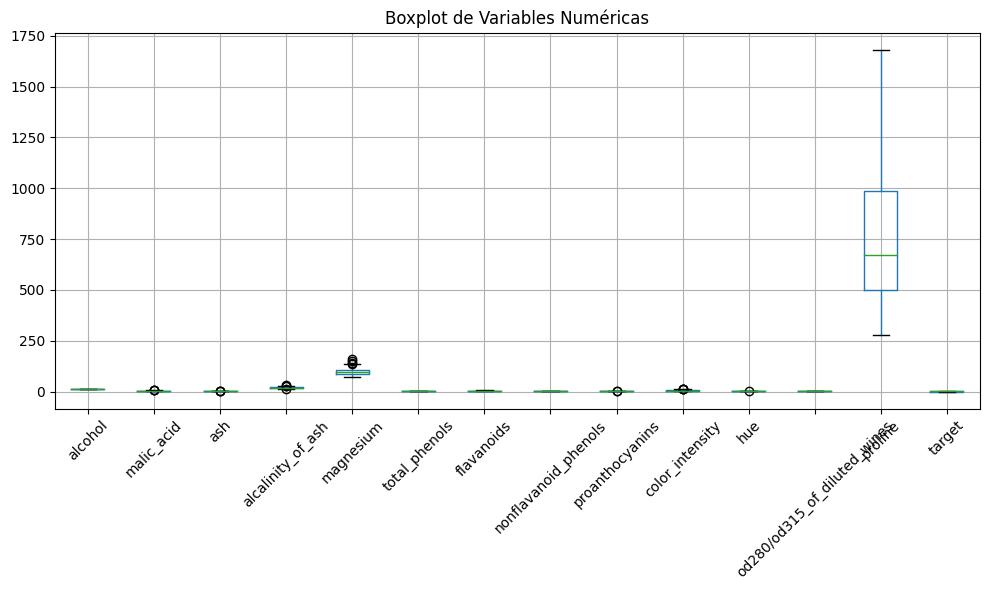

In [10]:
plt.figure(figsize=(10, 6))
numeric_cols.boxplot()
plt.title('Boxplot de Variables Numéricas')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

En el siguiente gráfico se encapsula cada variable númerica con su propia escala permitiendo una mejor visualización.

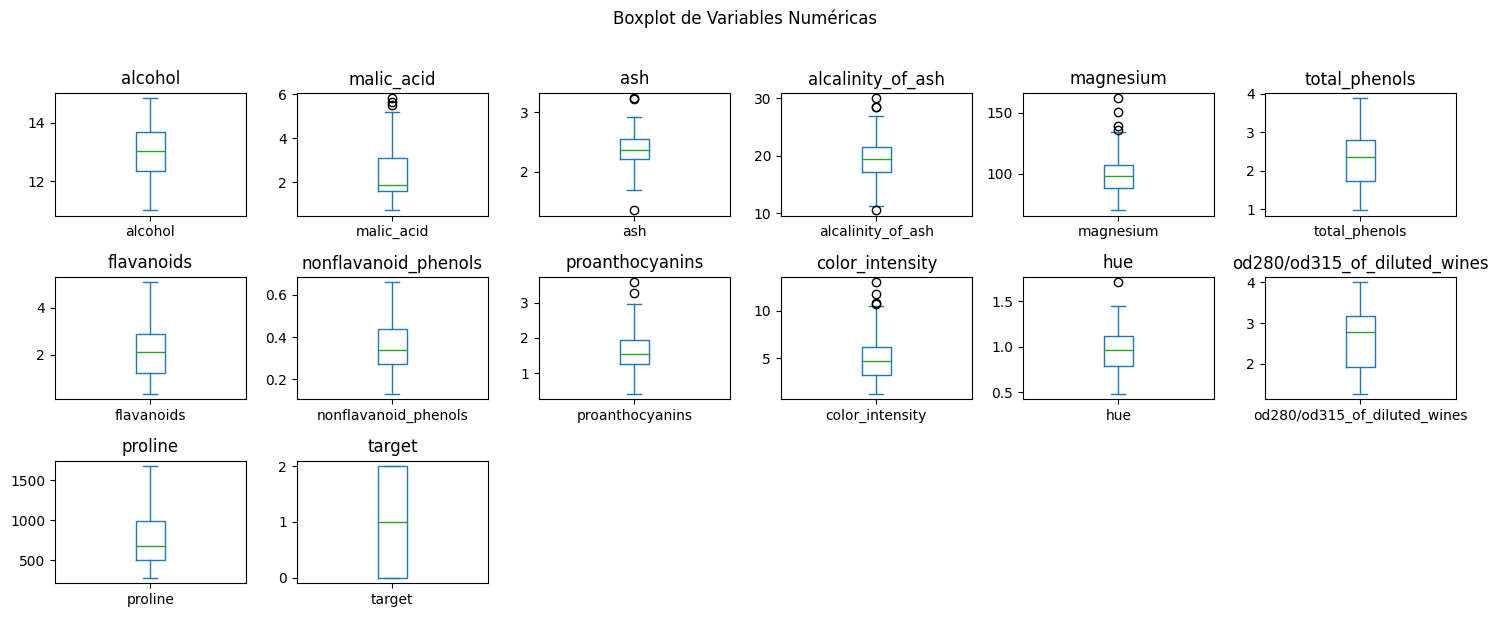

In [20]:
num_plots = len(numeric_cols.columns)


num_cols = 6
num_rows = (num_plots - 1) // num_cols + 1

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 2*num_rows))
fig.suptitle('Boxplot de Variables Numéricas', y=1.02)  # Título general del gráfico


for i, ax in enumerate(axes.flatten()):
    if i < num_plots:
        col = numeric_cols.columns[i]
        numeric_cols[col].plot(kind='box', ax=ax)
        ax.set_title(col)
        ax.set_ylabel('')
        ax.set_xlabel('')
    else:
        ax.axis('off')
plt.tight_layout()
plt.show()

##Función para ver porcentaje de outliers

In [7]:
def porcentaje_outliers_df(df):
    resultados = []
    for column in df.columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = ((df[column] < lower_bound) | (df[column] > upper_bound))
        porcentaje_outliers = outliers.sum() / len(df[column]) * 100
        resultados.append([column, porcentaje_outliers])
    df_resultados = pd.DataFrame(resultados, columns=['Variable', 'Porcentaje de Outliers'])
    return df_resultados

In [8]:
# Llamada a la función para obtener el DataFrame de porcentajes de outliers por variable
df_porcentajes_outliers = porcentaje_outliers_df(df)
print("Porcentaje de outliers por variable:")
print(df_porcentajes_outliers)

Porcentaje de outliers por variable:
                        Variable  Porcentaje de Outliers
0                        alcohol                0.000000
1                     malic_acid                1.685393
2                            ash                1.685393
3              alcalinity_of_ash                2.247191
4                      magnesium                2.247191
5                  total_phenols                0.000000
6                     flavanoids                0.000000
7           nonflavanoid_phenols                0.000000
8                proanthocyanins                1.123596
9                color_intensity                2.247191
10                           hue                0.561798
11  od280/od315_of_diluted_wines                0.000000
12                       proline                0.000000
13                        target                0.000000


##Desviación estandard

Es posible definir la cantidad de outliers utilizando desviación estandard.

In [26]:
import pandas as pd

def porcentaje_outliers_std(df):
    resultados = []
    for column in df.columns:
        std = df[column].std()
        mean = df[column].mean()
        lower_bound = mean - 2 * std
        upper_bound = mean + 2 * std
        outliers = ((df[column] < lower_bound) | (df[column] > upper_bound))
        porcentaje_outliers = outliers.sum() / len(df[column]) * 100
        resultados.append([column, porcentaje_outliers])
    df_resultados = pd.DataFrame(resultados, columns=['Variable', 'Porcentaje de Outliers'])
    return df_resultados

In [27]:
# Usando la función
df_porcentajes_outliers_std = porcentaje_outliers_std(df)
print("Porcentaje de outliers por variable utilizando el método de desviación estándar:")
print(df_porcentajes_outliers_std)

Porcentaje de outliers por variable utilizando el método de desviación estándar:
                        Variable  Porcentaje de Outliers
0                        alcohol                1.685393
1                     malic_acid                5.056180
2                            ash                4.494382
3              alcalinity_of_ash                5.617978
4                      magnesium                3.932584
5                  total_phenols                1.685393
6                     flavanoids                0.561798
7           nonflavanoid_phenols                2.808989
8                proanthocyanins                6.741573
9                color_intensity                5.056180
10                           hue                2.247191
11  od280/od315_of_diluted_wines                0.000000
12                       proline                3.370787
13                        target                0.000000


Otro método utilizado es realizar histogramas para cada variable a manera de que por medio de su distribución se pueda interpretar si estamos afrontando una variable con datos atípicos.
En el siguiente código marcamos los datos atípicos con rojo.

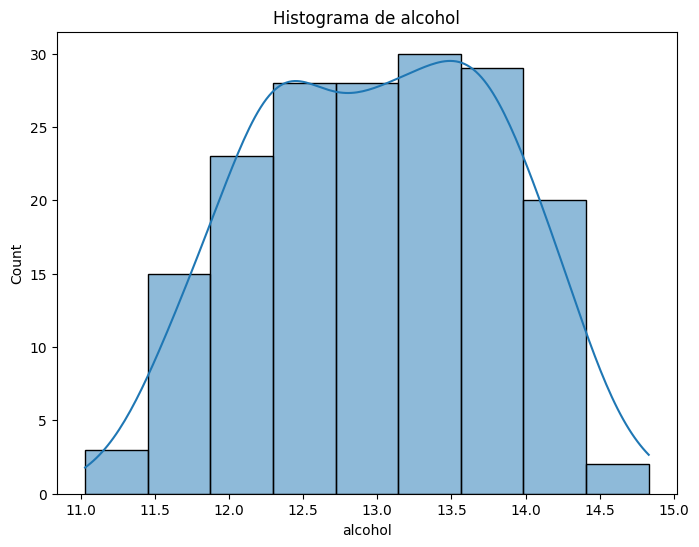

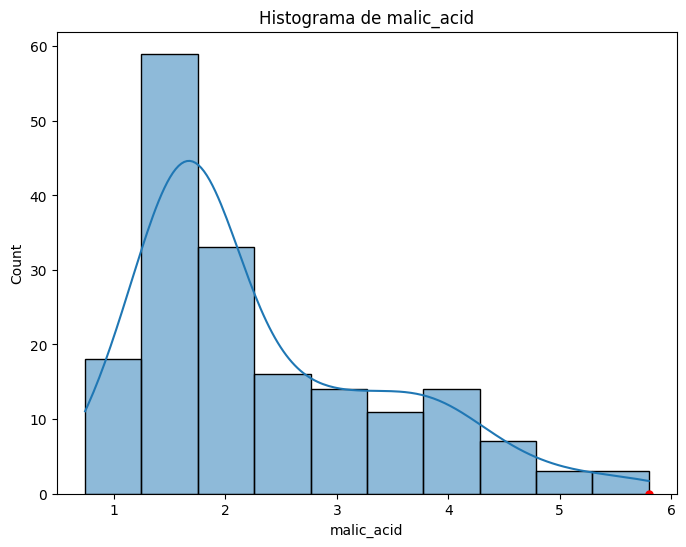

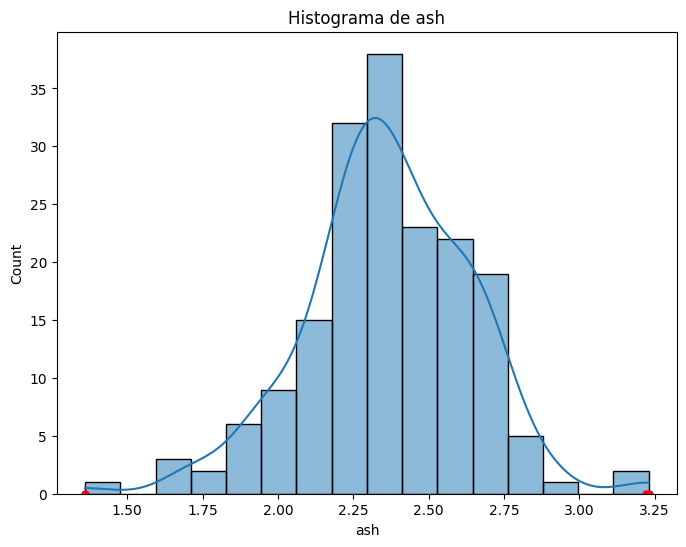

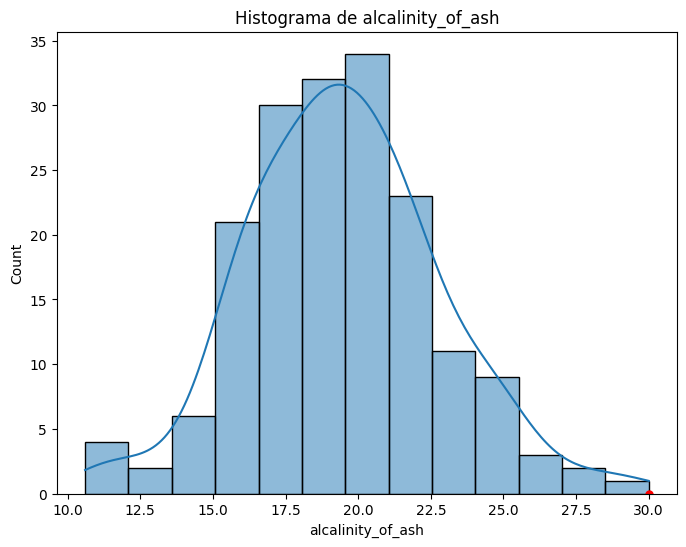

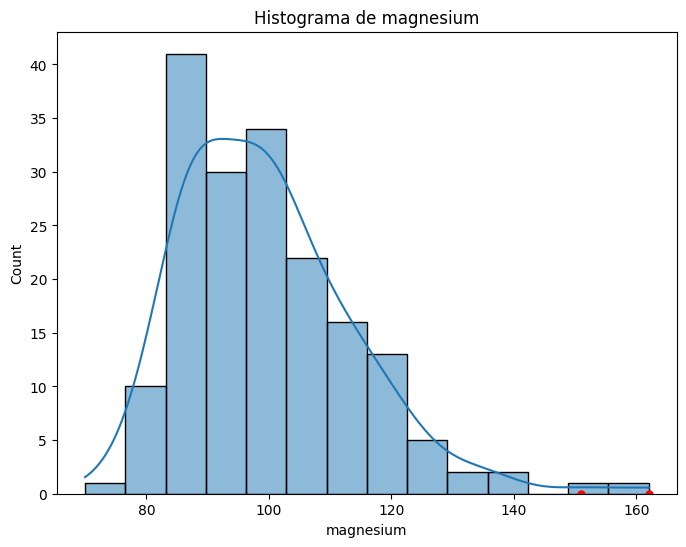

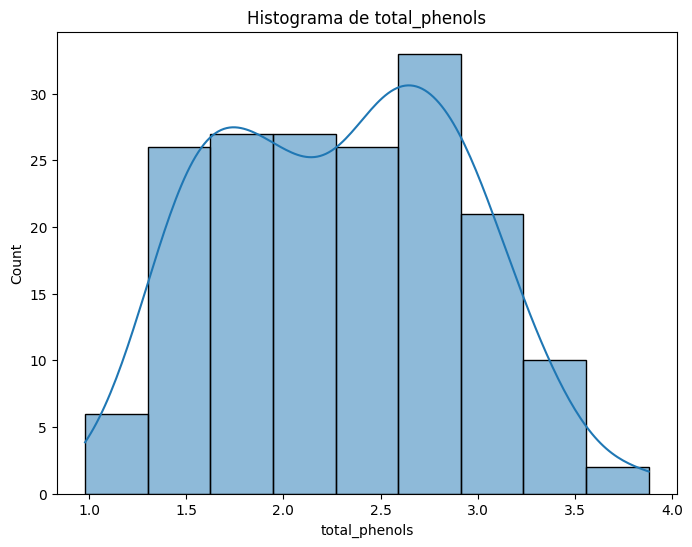

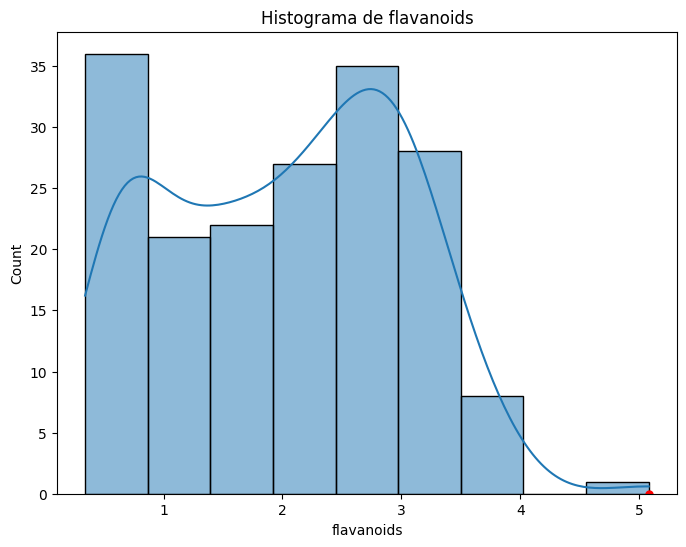

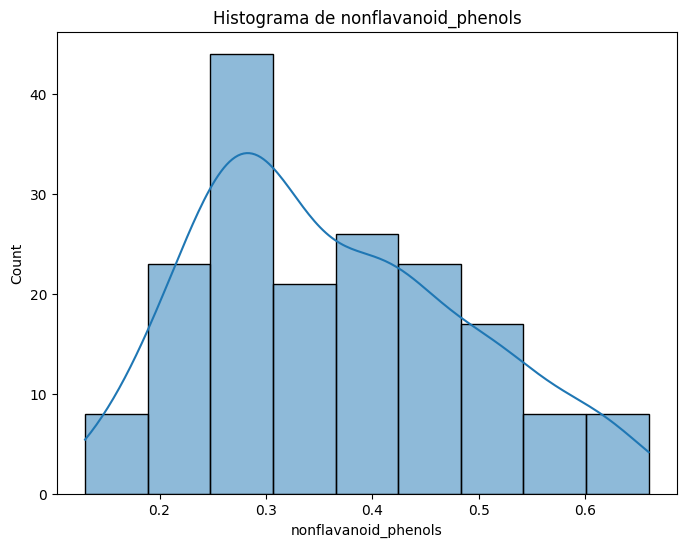

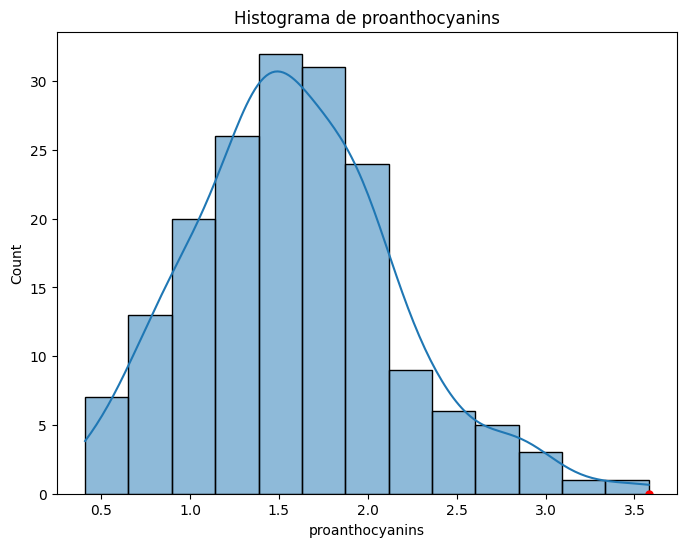

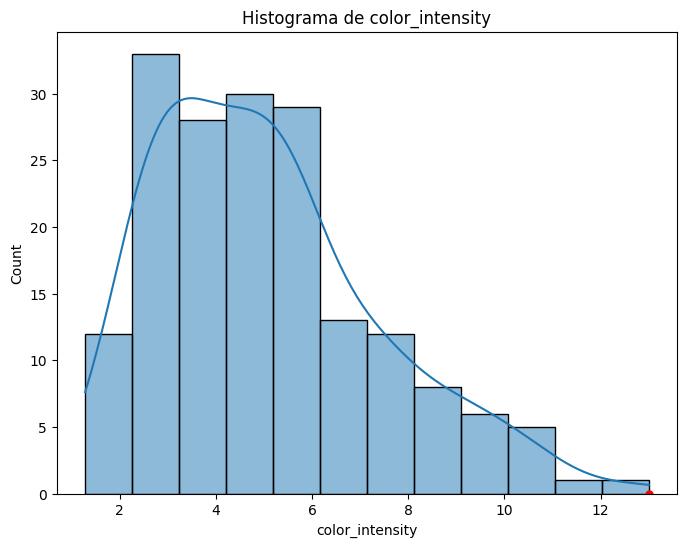

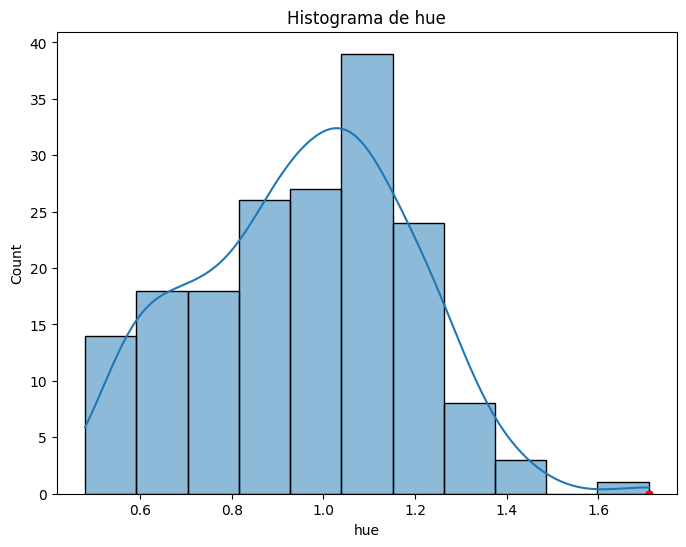

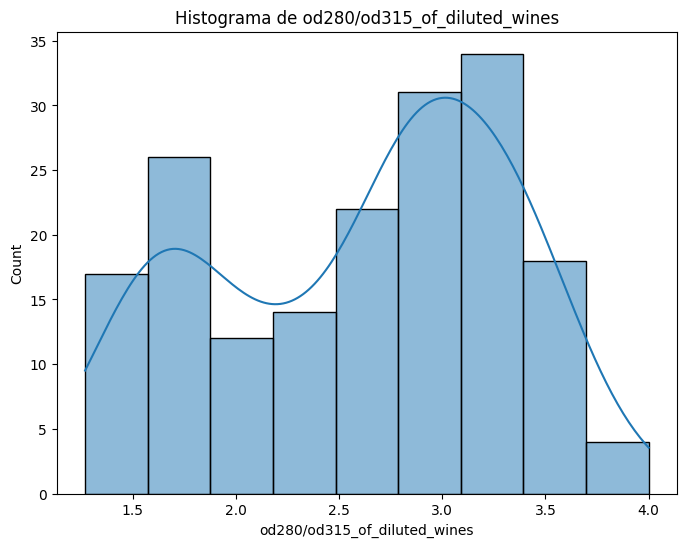

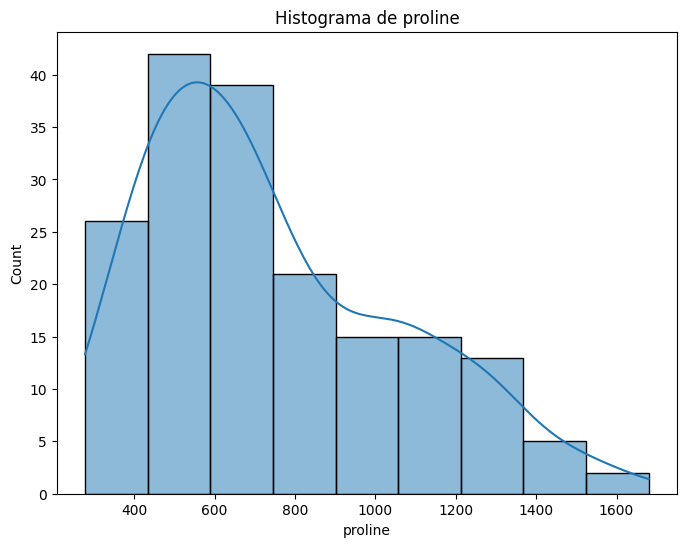

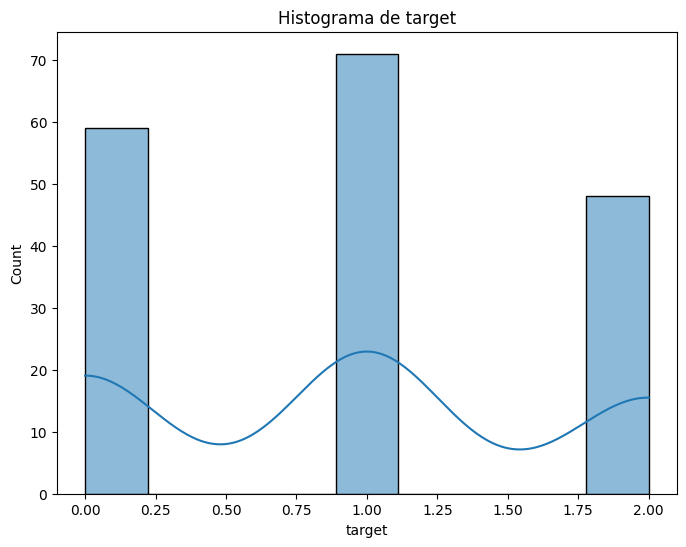

In [32]:
import numpy as np

def plot_histograms(dataframe):
    numeric_cols = dataframe.select_dtypes(include=['float64', 'int64'])
    for column in numeric_cols.columns:
        plt.figure(figsize=(8, 6))
        sns.histplot(dataframe[column], kde=True)
        outliers = dataframe[np.abs(dataframe[column]-dataframe[column].mean()) > (3*dataframe[column].std())]
        plt.plot(outliers[column], np.zeros_like(outliers[column]), 'ro', markersize=5)
        plt.title(f'Histograma de {column}')
        plt.show()
plot_histograms(df)
